In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Wharton Acads/Python/kyphosis.csv')

In [ ]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


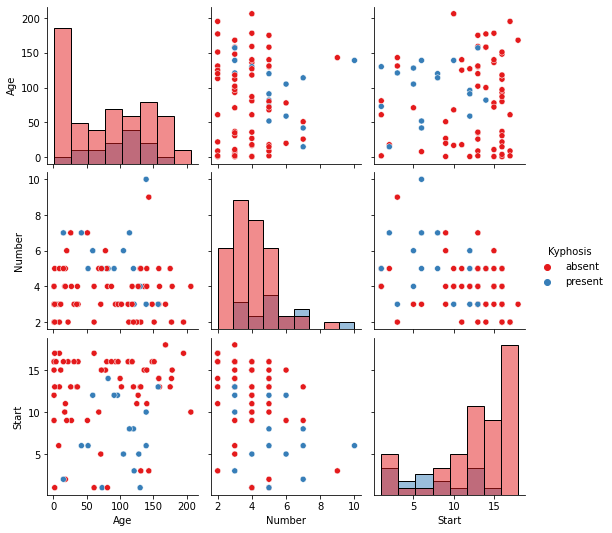

In [ ]:
sns.pairplot(data=df,hue='Kyphosis',palette='Set1',diag_kind='hist')

In [ ]:
from sklearn.model_selection import train_test_split
x=df.drop('Kyphosis',axis=1)
y=df['Kyphosis']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
predictions = dtree.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[17  3]
 [ 0  5]]


              precision    recall  f1-score   support

      absent       1.00      0.85      0.92        20
     present       0.62      1.00      0.77         5

    accuracy                           0.88        25
   macro avg       0.81      0.93      0.84        25
weighted avg       0.93      0.88      0.89        25



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=500)
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=500)

In [ ]:
rfc_pred=rfc.predict(x_test)
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

[[18  2]
 [ 2  3]]


              precision    recall  f1-score   support

      absent       0.90      0.90      0.90        20
     present       0.60      0.60      0.60         5

    accuracy                           0.84        25
   macro avg       0.75      0.75      0.75        25
weighted avg       0.84      0.84      0.84        25



In [ ]:
df['Kyphosis']

0      absent
1      absent
2     present
3      absent
4      absent
       ...   
76    present
77     absent
78     absent
79    present
80     absent
Name: Kyphosis, Length: 81, dtype: object

In [ ]:
df['Kyphosis'].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64